The motto of this project is to apply all the statistical concepts that are learnt in the class room in understanding data and building a hypothesis of linear relation and validating it.

Hypothesis: There is a linear relationship between sales and advertising.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Advertising.csv')

In [3]:
df.drop(columns=['Unnamed: 0'], inplace=True)

In [4]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: pandas.scatter_matrix is deprecated, use pandas.plotting.scatter_matrix instead
  


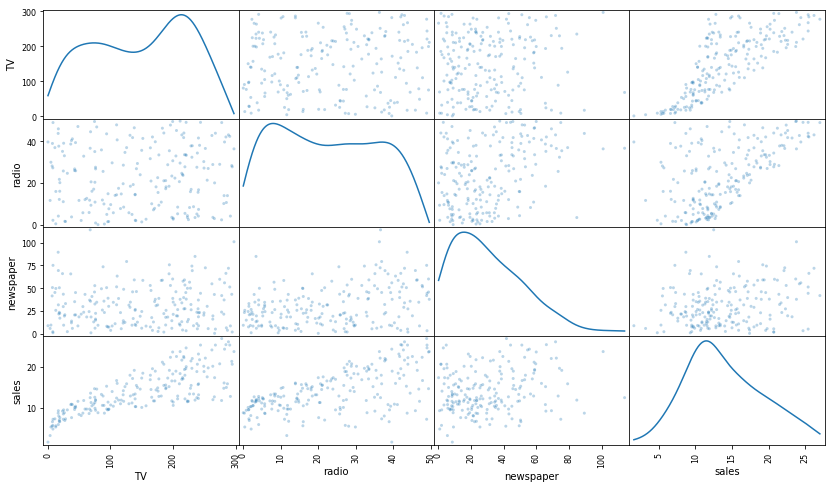

In [5]:
# Produce a scatter matrix for each pair of features in the data
pd.scatter_matrix(df, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

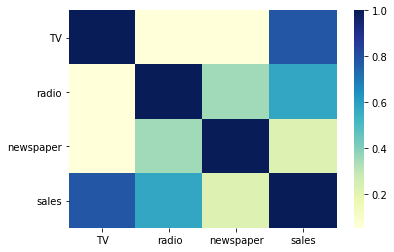

In [6]:
sns.heatmap(df.corr(), cmap="YlGnBu");

Based on the correlation scatter plot and correlation coefficient, I can conclude two things:
1) there is no strong collinearity among predictors which is a good thing.
2) There are some signs of linear relationship between (TV,radio) and sales while TV advertising show a significant linear relationship with sales than radio. On the hindside, newspaper doesn't really show significant linear relationship with sales

## Hypothesis: TV and radio might have significant linear relationship on sales but newspaper doesn't exibit linear relationship

# Modelling
I will be using ordinary least square method to get the regression line

In [7]:
import statsmodels.api as sm
X = df[['TV','radio','newspaper']]
y = df['sales']
X=sm.add_constant(X)
model = sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Fri, 16 Aug 2019   Prob (F-statistic):           1.58e-96
Time:                        01:41:42   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
radio          0.1885      0.009     21.893      0.000       0.172       0.206
newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Interpreting ANOVA regression analysis table

Coefficient of Determination is 0.897 which means that 89.7% of the variability between independent and dependent variables is explained by the regression estimate.

TV and radio have zero p-values which means that we can reject the null hypothesis of the corresponding coefficients are zero.
Which means they have significant linear relationship with sales.

Newspaper has p-value > 0.05 which means we fail to reject the null hypothesis and there is not enough evidence to prove that newspaper has significant linear relationship with sales.

## I will try to build a model with out newspaper 

In [8]:
X1 = df[['TV','radio']]
y1 = df['sales']
Xc=sm.add_constant(X1)
model1 = sm.OLS(y1,Xc).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     859.6
Date:                Fri, 16 Aug 2019   Prob (F-statistic):           4.83e-98
Time:                        01:41:42   Log-Likelihood:                -386.20
No. Observations:                 200   AIC:                             778.4
Df Residuals:                     197   BIC:                             788.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9211      0.294      9.919      0.000       2.340       3.502
TV             0.0458      0.001     32.909      0.000       0.043       0.048
radio          0.1880      0.008     23.382      0.000       0.172       0.204
==============================================================================
Omnibus:                       60.022   Durbin-Watson:                   2.081
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              148.679
Skew:                          -1.323   Prob(JB):                     5.19e-33
Kurtosis:                       6.292   Cond. No.                         425.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Observation

It is very evident that newspaper didn't have linear relationship with sales. We could get the same R square value.

## Residual Plots

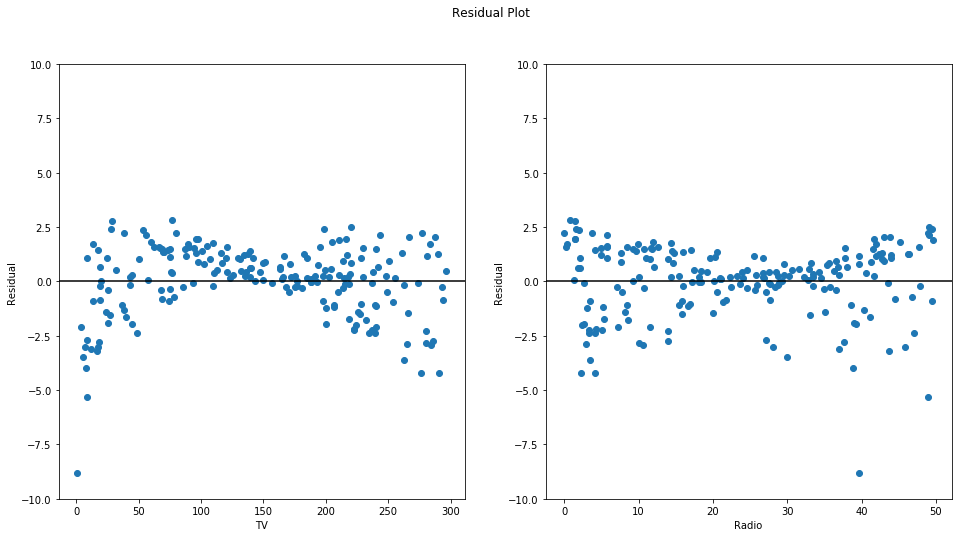

In [9]:
y_pred = model1.predict(Xc)
fig,(ax1,ax2) = plt.subplots(1,2, figsize=(16,8))
fig.suptitle('Residual Plot')
ax1.set_ylim(-10,10)
ax1.axhline(y=0,color='k')
ax1.set_xlabel('TV')
ax1.set_ylabel('Residual')
ax1.scatter(X1['TV'],(y1-y_pred))

ax2.set_ylim(-10,10)
ax2.axhline(y=0,color='k')
ax2.set_xlabel('Radio')
ax2.set_ylabel('Residual')
ax2.scatter(X1['radio'],(y1-y_pred))

plt.show()

## Fair distribution that means the linear model is a right choice but there are few outliers in the data though.